## Dogs vs. Cats
#### Sondre L. Solberg og Fredrik Bontveit

Imports

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython
import seaborn as sns
import matplotlib.image as mpimg
import os

## Frame the problem and look at the biger picture

TODO

Forklare om oppgaven og hva modellen vår skal gjøre

Vi skal lage en modell som kan skille mellom hunde og katte-bilder. 

Å skille mellom hunde og katte-bilder har egentlig ikke så stor nytteverdi i virkeligheten, men formålet med denne oppgaven er i hovedsak en øvelse for oss til å lære om maskinlæring og lage våre egne prosjekter.

## Get The Data

Dataen er hentet fra Kaggle

Kilde: https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition

Starter med å laste ned dataen fra Kaggle

In [3]:
from pathlib import Path

NB_DIR = %pwd
NB_DIR = Path(NB_DIR)

In [4]:
DATA = NB_DIR/'data'
DATA.mkdir(exist_ok=True)

In [5]:
import subprocess

if os.path.exists("data\\test.zip") and os.path.exists("data\\train.zip") == False:
    command = f'kaggle competitions download -c dogs-vs-cats-redux-kernels-edition -p {DATA}'
    subprocess.call(command, shell=True)
else:
    print("Filen er allerede lastet ned...")

Filen er allerede lastet ned...


In [6]:
%ls $DATA

 Volume in drive C is Windows
 Volume Serial Number is E016-8642

 Directory of C:\Users\Sondre\Dropbox\Skole-Hib\3_Klasse\DAT158\Oblig2-Cats_or_Dogs\data

12.11.2018  15.31    <DIR>          .
12.11.2018  15.31    <DIR>          ..
05.11.2018  16.24           113 903 sample_submission.csv
12.11.2018  15.31    <DIR>          test
05.11.2018  16.21       284 478 493 test.zip
12.11.2018  15.31    <DIR>          train
05.11.2018  16.24       569 918 665 train.zip
               3 File(s)    854 511 061 bytes
               4 Dir(s)   4 455 047 168 bytes free


Pakker zip filene ut

In [7]:
import zipfile

if (os.path.isdir("data\\test") and os.path.isdir("data\\train")) == False:
    for file in DATA.glob('*.zip'):
        with zipfile.ZipFile(DATA/file, "r") as zip_ref:
            zip_ref.extractall(DATA)
else:
    print("Zip filene er allerede pakket ut...")

Zip filene er allerede pakket ut...


In [8]:
%ls $DATA

 Volume in drive C is Windows
 Volume Serial Number is E016-8642

 Directory of C:\Users\Sondre\Dropbox\Skole-Hib\3_Klasse\DAT158\Oblig2-Cats_or_Dogs\data

12.11.2018  15.31    <DIR>          .
12.11.2018  15.31    <DIR>          ..
05.11.2018  16.24           113 903 sample_submission.csv
12.11.2018  15.31    <DIR>          test
05.11.2018  16.21       284 478 493 test.zip
12.11.2018  15.31    <DIR>          train
05.11.2018  16.24       569 918 665 train.zip
               3 File(s)    854 511 061 bytes
               4 Dir(s)   4 454 891 520 bytes free


### 3. Explore the data to gain insights

In [9]:
import os
import glob
train_dir = (str(DATA/'train'))
test_dir = (str(DATA/'test'))

In [10]:
train_cats_arr = glob.glob(os.path.join(train_dir, 'cat*'))
train_dogs_arr = glob.glob(os.path.join(train_dir, 'dog*'))
train_data_arr = glob.glob(os.path.join(train_dir, '*'))
test_data_arr = glob.glob(os.path.join(test_dir, '*'))

In [11]:
labels = []

for i in train_data_arr:
    if 'cat' in i:
        labels.append('Cat')
    else:
        labels.append('Dog')

In [12]:
X_data = []
files = train_data_arr
# for myFile in files:
#    image = mpimg.imread(myFile)
#    X_data.append(image)
    
print(len(X_data))

0


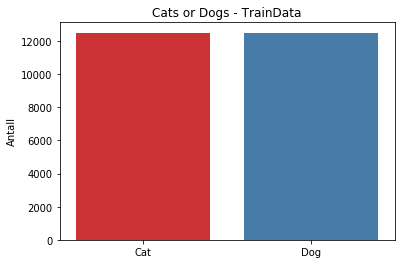

In [13]:
sns.countplot(labels, palette="Set1")
plt.ylabel("Antall")
plt.title("Cats or Dogs - TrainData")
plt.show()

In [14]:
print("Antall TestData: " + str(len(test_data_arr)) + " - NB! Kaggle competitions TestData")

Antall TestData: 12500 - NB! Kaggle competitions TestData


Ser på noen av bildene

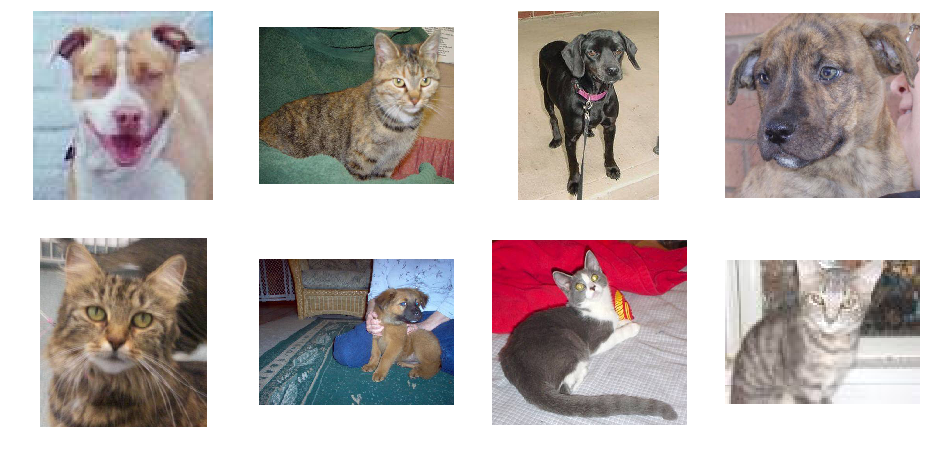

In [15]:
np.random.seed(96)
test_pics = glob.glob(os.path.join(test_dir, '*'))

fig = plt.figure(figsize=(16,16))
for x in range(1, 9):
    img_nr = np.random.randint(12500)
    img = mpimg.imread(test_data_arr[img_nr])
#    img = mpimg.imread(train_cats_arr[img_nr])
    fig.add_subplot(4, 4, x)
    plt.axis('off')
    plt.imshow(img)
    
plt.show()


Endrer størrelsen på bildene...

In [22]:
from PIL import Image

IMAGE_SIZE = 50
#smallset = train_data_arr[0:20]
train_data = []

for i in train_data_arr:
    img = Image.open(i)
    new_img = img.resize((IMAGE_SIZE, IMAGE_SIZE)) #Eventuelt 64?
    train_data.append(new_img)

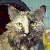

In [23]:
train_data[2]

In [18]:
# pip install tensorflow

from tensorflow.keras import layers
from tensorflow.keras import Model

C:\Users\Sondre\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### 4. Prepare the data to better expose the underlying data patterns to Machine Learning algorithms

TODO - Forklare kaggle test data...

Vi har 25000 bilder til rådighet for trening og testing

Deler de opp til 80/20, 80% testdata og 20% treningsdata

In [24]:
print("Antall testdata: " + str(25000*0.8) + "\nAntall treningsdata: " + str(25000*0.2))

Antall testdata: 20000.0
Antall treningsdata: 5000.0


In [25]:
import random
random.seed(96)
random.shuffle(train_data) #Reshuffler dataen i arrayen

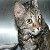

In [26]:
train_data[2]

In [46]:
train = train_data[:5000]
test = train_data[-20000:]

In [47]:
LR = 0.01

In [ ]:
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression



# Building convolutional convnet
convnet = input_data(shape=[None, IMAGE_SIZE, IMAGE_SIZE, 1], name='input')
# http://tflearn.org/layers/conv/
# http://tflearn.org/activations/
convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='log')


### 5. Explore many different models and short-list the best ones

### 6. Fine-tune your models and combine them into a great solution

### 7. Present your solution

### 8. Launch, monitor and maintain your system